This notebook demonstrates the result of the first round of data collection, collected in the San Francisco Bay Area by @shankari. The round had several shortcomings, some of which were addressed during the data collection and some of which were fixed before starting the second round of data collection.

## Import all the dependencies

In [2]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [3]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [4]:
# For plots
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# For maps
import branca.element as bre

In [6]:
# For displaying dates
import arrow

## Load and validate data

The first issue to note is that we actually have two specs here. The first spec is the checked in `evaluation.spec.sample`, which defines calibration for both stationary and moving instances, and some evaluation trips. However, while starting with the calibration, we noticed some inconsistencies between the power curves. So in order to be more consistent, I defined a second, calibration-only spec `examples/calibration.only.json`, which essentially repeats the calibration experiments multiple times.

After that, I returned to the first set of experiments for the moving calibration and the evaluation.

In [7]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sdmco1 = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "sfba_med_freq_calibration_only")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564262922}
response = <Response [200]>
Found 10 entries
After iterating over 10 entries, entry found
Found spec = Calibration for medium frequencies only, trial #1
Evaluation ran from 2019-07-17T17:00:00-07:00 -> 2019-07-28T17:00:00-07:00


In [8]:
import importlib
importlib.reload(ezev)

<module 'emeval.viz.eval_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/eval_view.py'>

In [9]:
pvmco1 = eipv.PhoneView(sdmco1)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 41 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 29 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 29 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563788085.765, 'end_time': 1563811841.83}
response = <Response [200]>
Found 14 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563863231.367, 'end_time': 1563890199.48}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563944815.921, 'end_time': 1563973553.057}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563678102.453, 'end_time': 1563699755.407}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563699755.418, 'end_time': 15637232

response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563944788.946683, 'end_time': 1563973524.094161}
response = <Response [200]>
Found 23 entries
Processing data for android phones
Processing data for ios phones
-------------------- About to fill in location information --------------------
Processing data for android phones
About to retrieve data for ucb-sdb-android-1 from 1563678069.847 -> 1563699745.856
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1563678069.847, 'end_time': 1563699745.856}
response = <Response [200]>
Found 176 entries
Retrieved 176 entries with timestamps [1563678070.162, 1563678102.064, 1563678133, 1563678164, 1563678193, 1563678198.833, 1563678223, 1563678253, 1563678284, 1563678314]...
About to retrieve data for ucb-sdb-android-1 from 1563699740.952 -> 1563699745.856
About to retrieve messages

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563811866.707]...
About to retrieve data for ucb-sdb-android-2 from 1563863242.745 -> 1563890205.16
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563863242.745, 'end_time': 1563890205.16}
response = <Response [200]>
Found 64 entries
Retrieved 64 entries with timestamps [1563863243.22, 1563863309.956, 1563863401.912, 1563863545.365, 1563863846, 1563864126.918, 1563864147, 1563864446, 1563864651.912, 1563864746]...
About to retrieve data for ucb-sdb-android-2 from 1563890192.029 -> 1563890205.16
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563890192.029, 'end_time': 1563890205.16}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563890192.029]...
About to retrieve data for ucb-sdb-android-2 from 1563944837.097 -> 1563973569.17
About to re

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563788109.602]...
About to retrieve data for ucb-sdb-android-4 from 1563788112.982 -> 1563811918.395
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1563788112.982, 'end_time': 1563811918.395}
response = <Response [200]>
Found 29 entries
Retrieved 29 entries with timestamps [1563788114.181, 1563788143.927, 1563788395.582, 1563788445.944, 1563788644.929, 1563788748, 1563789049.943, 1563789350.923, 1563789600.956, 1563789651.965]...
About to retrieve data for ucb-sdb-android-4 from 1563811916.122 -> 1563811918.395
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1563811916.122, 'end_time': 1563811918.395}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563811916.122]...
About to retrieve data for ucb-sdb-android-4 from 1563863286.928 -> 15638902

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563791379.027669]...
About to retrieve data for ucb-sdb-ios-2 from 1563863200.2893429 -> 1563890167.611793
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563863200.2893429, 'end_time': 1563890167.611793}
response = <Response [200]>
Found 8 entries
Retrieved 8 entries with timestamps [1563863192.454042, 1563863011.5996552, 1563863200.787012, 1563863200.939331, 1563874976.4774199, 1563875276.5135999, 1563875576.556004, 1563887201.3905249]...
About to retrieve data for ucb-sdb-ios-2 from 1563887201.3905249 -> 1563890167.611793
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563887201.3905249, 'end_time': 1563890167.611793}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563887201.3905249]...
About to retrieve data for ucb-sdb-ios-2 from 1563944748.46

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563807028.730815]...
About to retrieve data for ucb-sdb-ios-4 from 1563863221.463701 -> 1563890192.1354408
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1563863221.463701, 'end_time': 1563890192.1354408}
response = <Response [200]>
Found 8 entries
Retrieved 8 entries with timestamps [1563863214.3637872, 1563863221.989698, 1563863222.16133, 1563874686.479244, 1563874986.527452, 1563875256.5822449, 1563887212.843688, 1563888211.738552]...
About to retrieve data for ucb-sdb-ios-4 from 1563888211.738552 -> 1563890192.1354408
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1563888211.738552, 'end_time': 1563890192.1354408}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563888211.738552]...
About to retrieve data for ucb-sdb-ios-4 from 1563944788.946683

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563713778.672]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1563764643.841 -> 1563788093.89
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1563764643.841, 'end_time': 1563788093.89}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1563764645.226, 1563771570.477, 1563778950.311, 1563778952.588]...
About to retrieve data for ucb-sdb-android-2 from 1563778952.588 -> 1563788093.89
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1563778952.588, 'end_time': 1563788093.89}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563778952.588]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb

response = <Response [200]>
Found 3 entries
Retrieved 3 entries with timestamps [1563699796.04, 1563706861.628, 1563714244.146]...
About to retrieve data for ucb-sdb-android-4 from 1563714244.146 -> 1563723280.659
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1563714244.146, 'end_time': 1563723280.659}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563714244.146]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1563764729.726 -> 1563788112.969
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1563764729.726, 'end_time': 1563788112.969}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1563764731.126, 1563764733.734, 1563771972.55, 1563779118.658]...
About to retrieve data for ucb-sdb-android-4 from 1563779118.65

response = <Response [200]>
Found 12 entries
Retrieved 12 entries with timestamps [1563677976.3967457, 1563678003.39955, 1563678373.547831, 1563681602.41089, 1563685202.768147, 1563688802.909141, 1563692403.228663, 1563696006.1222181, 1563699602.991231, 1563699692.6787944]...
About to retrieve data for ucb-sdb-ios-2 from 1563699708.635943 -> 1563699714.155782
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563699708.635943, 'end_time': 1563699714.155782}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563699708.635943]...
About to retrieve data for ucb-sdb-ios-2 from 1563699714.171499 -> 1563723134.096898
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563699714.171499, 'end_time': 1563723134.096898}
response = <Response [200]>
Found 9 entries
Retrieved 9 entries with timestamps [1563699723.6364787, 1563703203.1362

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563890177.8923988]...
About to retrieve data for ucb-sdb-ios-3 from 1563944770.673845 -> 1563973484.065419
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1563944770.673845, 'end_time': 1563973484.065419}
response = <Response [200]>
Found 13 entries
Retrieved 13 entries with timestamps [1563944778.7140522, 1563948002.441855, 1563951602.8474631, 1563955202.3802419, 1563958802.9285169, 1563962402.8097959, 1563966002.812964, 1563969602.99663, 1563973202.95619, 1563973474.4260914]...
About to retrieve data for ucb-sdb-ios-3 from 1563973483.9662561 -> 1563973484.065419
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1563973483.9662561, 'end_time': 1563973484.065419}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563973483.9662561]...
About 

response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563788093.912, 'end_time': 1563811870.005}
response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563863242.745, 'end_time': 1563890205.16}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563944837.097, 'end_time': 1563973569.17}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 

response = <Response [200]>
Found 22 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['statemachine/transition'], 'start_time': 1563863211.0520248, 'end_time': 1563890178.148947}
response = <Response [200]>
Found 19 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['statemachine/transition'], 'start_time': 1563944770.673845, 'end_time': 1563973484.065419}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1563678039.2650728, 'end_time': 1563699736.081699}
response = <Response [200]>
Found 17 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/tran

### Issue #1: Multiple and missing transitions

While exploring the data after the collection was done, there were still inconsistencies in the transitions pushed to the server - there were a bunch of duplicate transitions, and two of the phones were missing start transitions for the second trip.

In [9]:
# Commented out because this fails
# pvt3.validate()

In [10]:
pvmco1.validate()

-------------------- About to validate calibration settings --------------------
Processing data for android phones
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['config/sensor_config'], 'start_time': 1563678069.847, 'end_time': 1563699745.856}
response = <Response [200]>
Found 1 entries
high_accuracy_stationary_0_0 -> [100]


KeyError: 'high_accuracy_stationary_0_0'

In [1]:
evmco1 = eiev.EvaluationView()
evmco1.from_view_multiple_runs(pvmco1, "")

NameError: name 'eiev' is not defined

## Now for the results (calibration, phone view)!

### Battery drain over time (moving calibration)

Again, the moving calibration runs were not very useful in terms of battery drain, since there were too few points to be useful. We actually have more points on android, but we have almost nothing for the iOS medium accuracy runs.

Part of this is inherent in the definition of moving calibration, since it is unlikely that we will move for 10-15 hours at a time to collect the kind of data we have in the stationary case. And if our trip lasts for an hour, but we only read the battery level once an hour, we will end up with close to no data.

But with some native code changes, I think we can do better wrt at least recording the battery reading at the trip start and end.

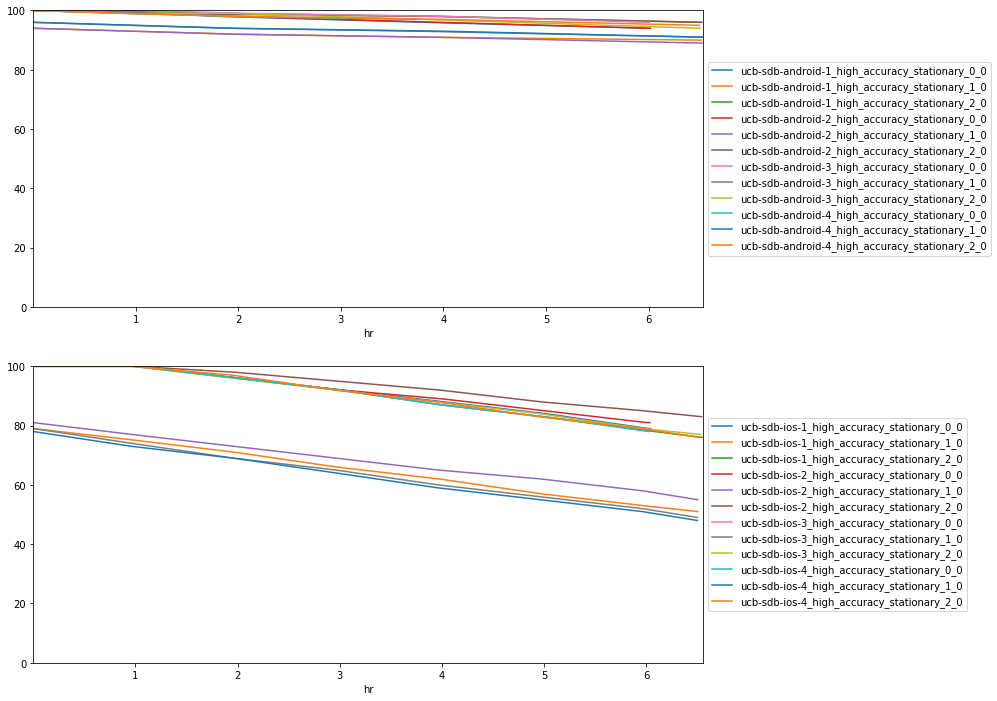

In [10]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=1, nrows=2, figsize=(12,12))

ezpv.plot_all_power_drain(ios_ax, pvmco1.map()["ios"], "calibration", "high")
ios_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ezpv.plot_all_power_drain(android_ax, pvmco1.map()["android"], "calibration", "high")
android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [ ]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=1, nrows=2, figsize=(12,12))

ezpv.plot_all_power_drain(ios_ax, pvmco1.map()["ios"], "calibration", "medium")
ios_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ezpv.plot_all_power_drain(android_ax, pvmco1.map()["android"], "calibration", "medium")
android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [ ]:
(ifig, axes) = plt.subplots(ncols=0, nrows=0, figsize=(12,3))

ezpv.plot_separate_power_drain(ifig, pvmco1.map()["ios"], 4, "calibration", "stationary")
# android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
(ifig, axes) = plt.subplots(ncols=0, nrows=0, figsize=(12,3))

ezpv.plot_separate_power_drain(ifig, pvmco1.map()["android"], 4, "calibration", "stationary")
# android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [ ]:
(ifig, axes) = plt.subplots(ncols=0, nrows=0, figsize=(16,4))

ezev.plot_separate_power_drain_multiple_runs(ifig, 2, evmco1.map("calibration")["ios"], "")
android_ax.legend(loc="upper center", bbox_to_anchor=(1, 0.5))
(ifig, axes) = plt.subplots(ncols=0, nrows=0, figsize=(16,4))

ezev.plot_separate_power_drain_multiple_runs(ifig, 2, evmco1.map("calibration")["android"], "")
android_ax.legend(loc="upper center", bbox_to_anchor=(1, 0.5))

In [ ]:
importlib.reload(ezev)

In [12]:
def display_transitions_ranges_values(ax, phone_map, range_key, trip_id_pattern, offset_hr=1):
    for phone_label, phone_details in phone_map.items():
        curr_calibration_ranges = phone_details["{}_ranges".format(range_key)]
        sel_calibration_ranges = [cr for cr in curr_calibration_ranges if trip_id_pattern in cr["trip_id"]]
        for r in sel_calibration_ranges:
            battery_df = r["battery_df"]
            start_level = battery_df.battery_level_pct.iloc[0]
            battery_df["battery_change_from_start"] = battery_df.battery_level_pct - start_level
            battery_df["hr_new"] = battery_df.hr + offset_hr
            ret_axes = battery_df.plot(x="hr_new", y="battery_change_from_start", ax=ax, label=phone_label+"_"+r["trip_id"], ylim=(0, -100), sharey=True)

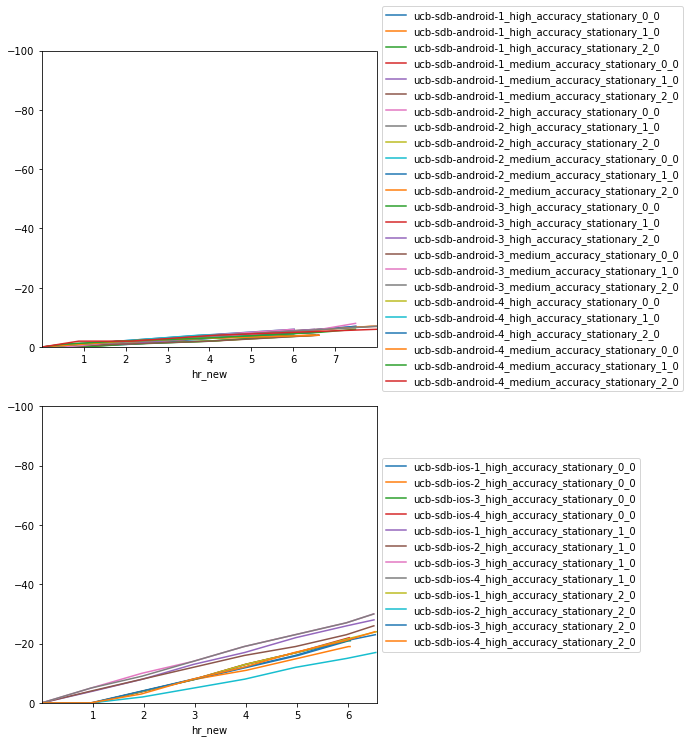

In [20]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=1, nrows=2, figsize=(6,12))

display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "high_accuracy_stationary_0", 0)
display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "high_accuracy_stationary_1", 0)
display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "high_accuracy_stationary_2", 0)
# display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "medium_accuracy_stationary_0", 0)
# display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "medium_accuracy_stationary_1", 0)
# display_transitions_ranges_values(ios_ax, pvmco1.map()["ios"], "calibration", "medium_accuracy_stationary_2", 0)
ios_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
display_transitions_ranges_values(android_ax, pvmco1.map()["android"], "calibration", "stationary", 0)
android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))